In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r"E:\titanic.csv")

In [8]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [10]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [11]:
df.shape

(891, 12)

In [12]:
df.size

10692

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [17]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())


In [18]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [19]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])


In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [22]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2
5         0       3    1  28.0      0      0   8.4583         1

In [23]:
df.tail()

Survived  Pclass  Sex   Age  SibSp  Parch   Fare  Embarked
884         0       3    1  25.0      0      0   7.05         2
886         0       2    1  27.0      0      0  13.00         2
887         1       1    0  19.0      0      0  30.00         2
889         1       1    1  26.0      0      0  30.00         0
890         0       3    1  32.0      0      0   7.75         1

In [24]:
X = df.drop(['Survived'],axis=1)
X

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         2
2         3    0  26.0      0      0   7.9250         2
3         1    0  35.0      1      0  53.1000         2
4         3    1  35.0      0      0   8.0500         2
5         3    1  28.0      0      0   8.4583         1
..      ...  ...   ...    ...    ...      ...       ...
884       3    1  25.0      0      0   7.0500         2
886       2    1  27.0      0      0  13.0000         2
887       1    0  19.0      0      0  30.0000         2
889       1    1  26.0      0      0  30.0000         0
890       3    1  32.0      0      0   7.7500         1

[577 rows x 7 columns]

In [25]:
Y = df[['Survived']]
Y

Survived
0           0
2           1
3           1
4           0
5           0
..        ...
884         0
886         0
887         1
889         1
890         0

[577 rows x 1 columns]

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler(feature_range=(0,1))
X1=minmax.fit_transform(X)
X1


array([[1.        , 1.        , 0.34693878, ..., 0.        , 0.11851246,
        1.        ],
       [1.        , 0.        , 0.42857143, ..., 0.        , 0.12954638,
        1.        ],
       [0.        , 0.        , 0.6122449 , ..., 0.        , 0.86800163,
        1.        ],
       ...,
       [0.        , 0.        , 0.28571429, ..., 0.        , 0.4903964 ,
        1.        ],
       [0.        , 1.        , 0.42857143, ..., 0.        , 0.4903964 ,
        0.        ],
       [1.        , 1.        , 0.55102041, ..., 0.        , 0.12668574,
        0.5       ]])

In [27]:
X2 = pd.DataFrame(X1, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
X2

Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       1.0  1.0  0.346939    0.5    0.0  0.118512       1.0
1       1.0  0.0  0.428571    0.0    0.0  0.129546       1.0
2       0.0  0.0  0.612245    0.5    0.0  0.868002       1.0
3       1.0  1.0  0.612245    0.0    0.0  0.131590       1.0
4       1.0  1.0  0.469388    0.0    0.0  0.138264       0.5
..      ...  ...       ...    ...    ...       ...       ...
572     1.0  1.0  0.408163    0.0    0.0  0.115243       1.0
573     0.5  1.0  0.448980    0.0    0.0  0.212505       1.0
574     0.0  0.0  0.285714    0.0    0.0  0.490396       1.0
575     0.0  1.0  0.428571    0.0    0.0  0.490396       0.0
576     1.0  1.0  0.551020    0.0    0.0  0.126686       0.5

[577 rows x 7 columns]

In [28]:
X2.describe()

Pclass         Sex         Age       SibSp  Parch        Fare  \
count  577.000000  577.000000  577.000000  577.000000  577.0  577.000000   
mean     0.751300    0.752166    0.495986    0.099653    0.0    0.243994   
std      0.366954    0.432129    0.174524    0.222517    0.0    0.206073   
min      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
25%      0.500000    1.000000    0.387755    0.000000    0.0    0.127094   
50%      1.000000    1.000000    0.469388    0.000000    0.0    0.141602   
75%      1.000000    1.000000    0.561224    0.000000    0.0    0.259093   
max      1.000000    1.000000    1.000000    1.000000    0.0    1.000000   

         Embarked  
count  577.000000  
mean     0.805893  
std      0.359059  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [29]:
X2 = X2.reset_index(drop=True)
Y = Y.reset_index(drop=True)
X3 = pd.concat([X2, Y], axis=1)
X3

Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Survived
0       1.0  1.0  0.346939    0.5    0.0  0.118512       1.0         0
1       1.0  0.0  0.428571    0.0    0.0  0.129546       1.0         1
2       0.0  0.0  0.612245    0.5    0.0  0.868002       1.0         1
3       1.0  1.0  0.612245    0.0    0.0  0.131590       1.0         0
4       1.0  1.0  0.469388    0.0    0.0  0.138264       0.5         0
..      ...  ...       ...    ...    ...       ...       ...       ...
572     1.0  1.0  0.408163    0.0    0.0  0.115243       1.0         0
573     0.5  1.0  0.448980    0.0    0.0  0.212505       1.0         0
574     0.0  0.0  0.285714    0.0    0.0  0.490396       1.0         1
575     0.0  1.0  0.428571    0.0    0.0  0.490396       0.0         1
576     1.0  1.0  0.551020    0.0    0.0  0.126686       0.5         0

[577 rows x 8 columns]

In [30]:
y=X3['Survived']#target
x=X3.drop('Survived',axis=1)#x contains features
y1=pd.DataFrame(y)
print(y1)
x1=pd.DataFrame(x)
print(x1)

     Survived
0           0
1           1
2           1
3           0
4           0
..        ...
572         0
573         0
574         1
575         1
576         0

[577 rows x 1 columns]
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0       1.0  1.0  0.346939    0.5    0.0  0.118512       1.0
1       1.0  0.0  0.428571    0.0    0.0  0.129546       1.0
2       0.0  0.0  0.612245    0.5    0.0  0.868002       1.0
3       1.0  1.0  0.612245    0.0    0.0  0.131590       1.0
4       1.0  1.0  0.469388    0.0    0.0  0.138264       0.5
..      ...  ...       ...    ...    ...       ...       ...
572     1.0  1.0  0.408163    0.0    0.0  0.115243       1.0
573     0.5  1.0  0.448980    0.0    0.0  0.212505       1.0
574     0.0  0.0  0.285714    0.0    0.0  0.490396       1.0
575     0.0  1.0  0.428571    0.0    0.0  0.490396       0.0
576     1.0  1.0  0.551020    0.0    0.0  0.126686       0.5

[577 rows x 7 columns]


<Axes: >

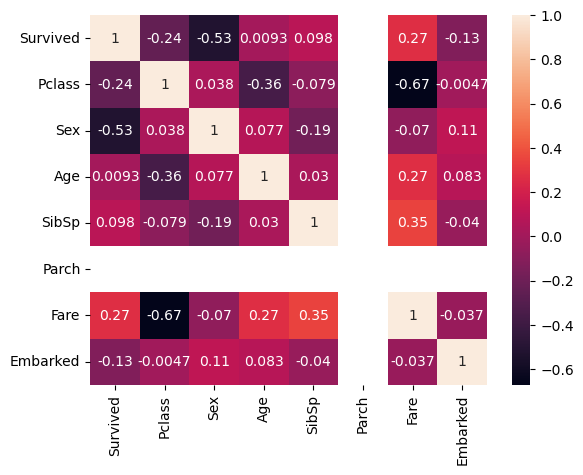

In [31]:

titanic_corr=df.corr()
sns.heatmap(titanic_corr,annot=True)

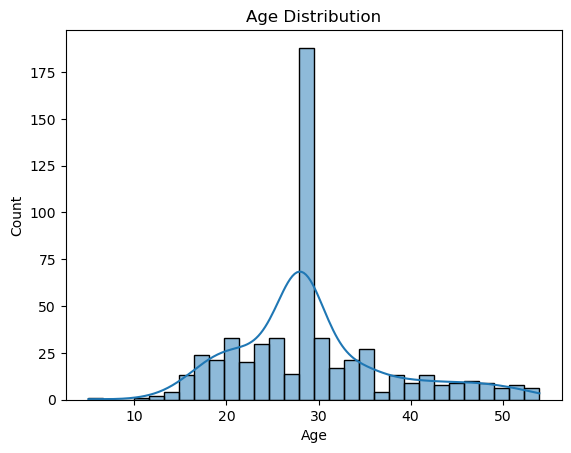

In [32]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


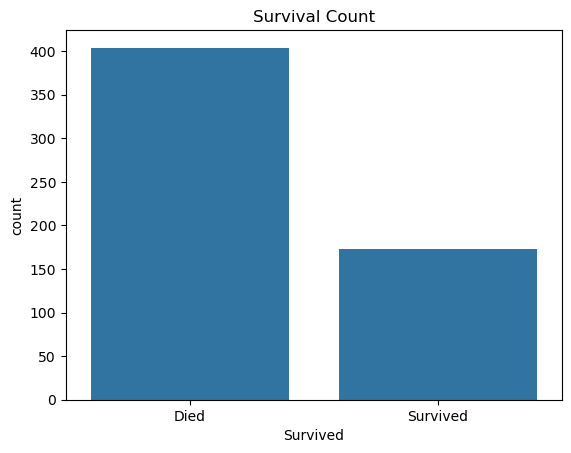

In [33]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()